# House Price Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [2]:
# Loading Dataset
df = pd.read_csv('house dataset.csv')

# Understand Dataset

In [3]:
# show dataset
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
# check how data big is or shape of the dataset 
df.shape

(21613, 21)

In [5]:
# Display concise information about the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [6]:
# check if dataset having null values or not
df.isnull().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [7]:
# Calculate the total count of null values in the entire DataFrame
df.isnull().sum().sum()

19522

In [8]:
# Assuming df is your DataFrame and 'No of Times Visited' is a column with NaN values
df.fillna({'No of Times Visited':'None'}, inplace=True)
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


# Handling Missing Values

In [9]:
na_data = [
    'Sale Price',
    'No of Bathrooms',
    'Flat Area (in Sqft)',
    'Lot Area (in Sqft)',
    'Area of the House from Basement (in Sqft)',
    'Zipcode',
    'Latitude',
    'Longitude',
    'Living Area after Renovation (in Sqft)'
]
# Fill the NaN values with the mean value 
for i in na_data:
    df[i].fillna(df[i].mean(), inplace=True)

In [10]:
# Calculate the total count of null values in the entire DataFrame
df.isnull().sum().sum()

0

In [11]:
# check if dataset having null values or not
df.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [12]:
"""This code provides statistical summary information about the DataFrame 'df,' including measures like count, mean, standard 
deviation, minimum, and maximum values for each numeric column"""

df.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673550e+05,0.930062,0.770067,918.296332,4.141964e+04,0.539989,1.105439,827.925135,442.575043,29.373411,401.679240,53.504187,0.138562,0.140827,685.388397,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070100e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
# Check the Duplicate values
df.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

In [14]:
# This code counts the occurrences of unique values in the "No of Bedrooms" column of a DataFrame and returns the counts as a Series
df["No of Bedrooms"].value_counts()

No of Bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

# Plotting Displot graph for Number of Bedrooms column

C:\Users\Samiksha\AppData\Local\Temp\ipykernel_5784\2300653770.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["No of Bedrooms"], color='m')


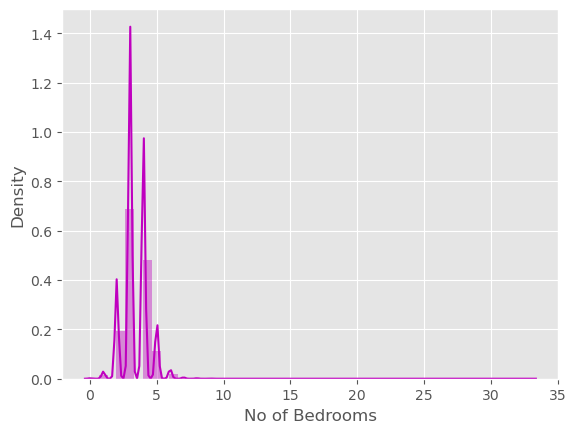

In [15]:
"""This code generates and shows a distribution plot for the "No of Bedrooms" column in the DataFrame df using the "ggplot" 
style, with the plot color set to pink"""

style.use("ggplot")
sns.distplot(df["No of Bedrooms"], color='m')
plt.show()

# Plotting Histogram graph for Number of Bedrooms column

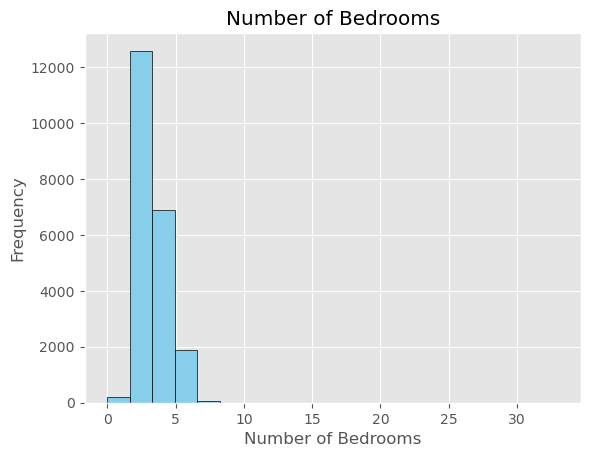

In [16]:
plt.hist(df['No of Bedrooms'], bins=20, color='skyblue', edgecolor='black')

# Adding labels and title to the plot
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.title('Number of Bedrooms')

# Show the histogram
plt.show()

# Plotting Histogram graph for Number of Bathrooms column

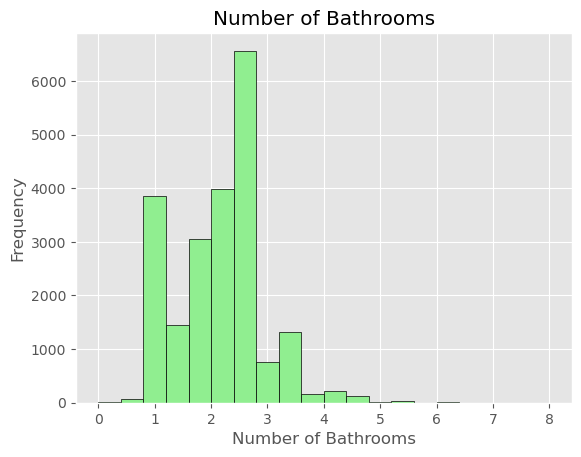

In [17]:
plt.hist(df['No of Bathrooms'], bins=20, color='lightgreen', edgecolor='black')

# Adding labels and title to the plot
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.title('Number of Bathrooms')

# Show the histogram
plt.show()

# Plotting Histogram graph for Sale Price column

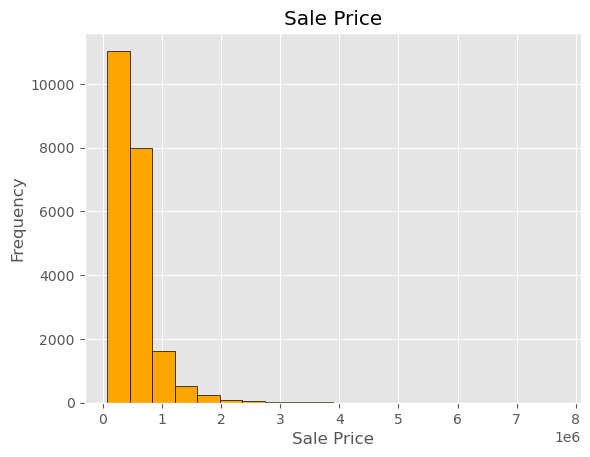

In [18]:
plt.hist(df['Sale Price'], bins=20, color='orange', edgecolor='black')

# Adding labels and title to the plot
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Sale Price')

# Show the plots
plt.show()

# Plotting Displot graph for Sale Price column

C:\Users\Samiksha\AppData\Local\Temp\ipykernel_5784\2041040434.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Sale Price"],color='m')


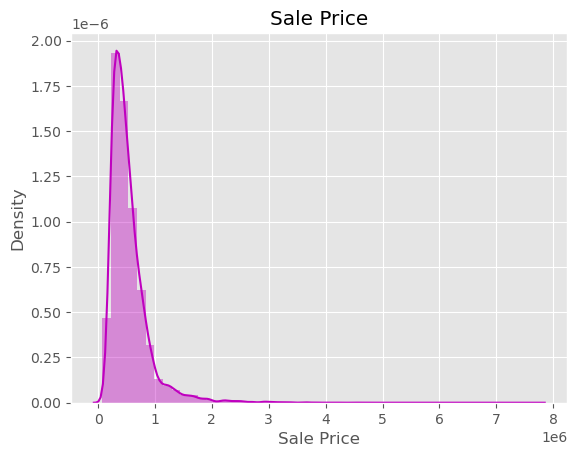

In [19]:
sns.distplot(df["Sale Price"],color='m')
plt.title("Sale Price")
plt.show()

In [20]:
# This code counts the occurrences of unique values in the "No of Floors" column of a DataFrame and returns the counts as a Series
df["No of Floors"].value_counts()

No of Floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

In [21]:
# Converting 'No of Floors' and 'Zipcode' column from dtype: float64 to dtype int64
df['No of Floors'] = df['No of Floors'].astype('int64')
df['Zipcode'] = df['Zipcode'].astype('int64')

In [22]:
# This code counts the occurrences of unique values in the "No of Floors" column of a DataFrame and returns the counts as a Series
df['No of Floors'].value_counts()

No of Floors
1    12590
2     8402
3      621
Name: count, dtype: int64

# Plotting Histogram graph for Number of Floors column 

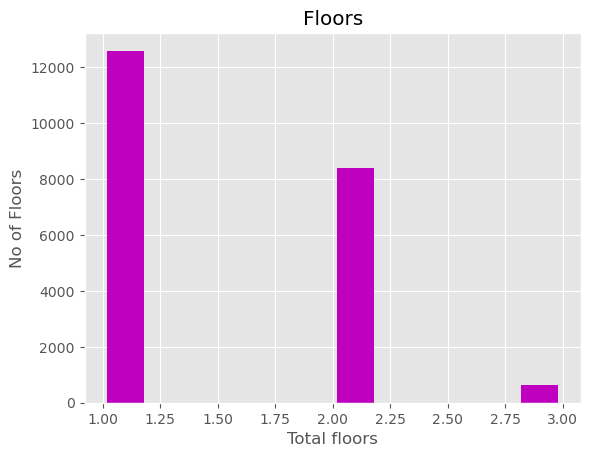

In [23]:
# Plot 'No of Floors' using Histogram
plt.hist(df['No of Floors'],rwidth=0.8, color='m')
plt.title('Floors')

# Adding labels
plt.xlabel('Total floors')
plt.ylabel('No of Floors')
plt.show()

In [24]:
# This code counts the occurrences of unique values in the "Waterfront View" column of a DataFrame and returns the counts as a Series
df["Waterfront View"].value_counts()

Waterfront View
No     21450
Yes      163
Name: count, dtype: int64

# Plotting pie chart graph for Waterfront View column

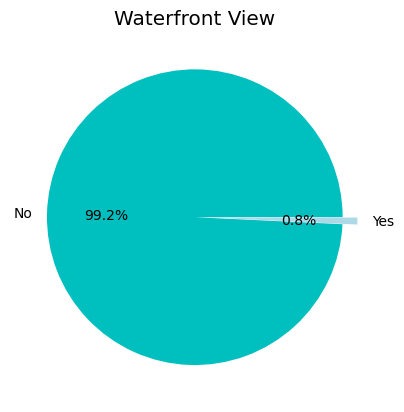

In [25]:
# Count Unique values
view = df["Waterfront View"].value_counts()

# Define colors for the pie chart
color = ('c', 'lightblue')
plt.pie(view,labels=view.index,colors = color ,autopct='%1.1f%%',explode=(0,0.1))
plt.title('Waterfront View')
plt.show()

In [26]:
# This code counts the occurrences of unique values in the "Age of House (in Years)" column of a DataFrame and returns the counts as a Series
df['Age of House (in Years)'].value_counts()

Age of House (in Years)
4      559
12     454
13     450
14     433
15     422
      ... 
85      30
117     29
116     27
83      24
84      21
Name: count, Length: 116, dtype: int64

In [27]:
# This code counts the occurrences of unique values in the "Renovated Year" column of a DataFrame and returns the counts as a Series
df['Renovated Year'].value_counts()

Renovated Year
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

# Plotting lineplot graph for Age of House and Renovated Year column

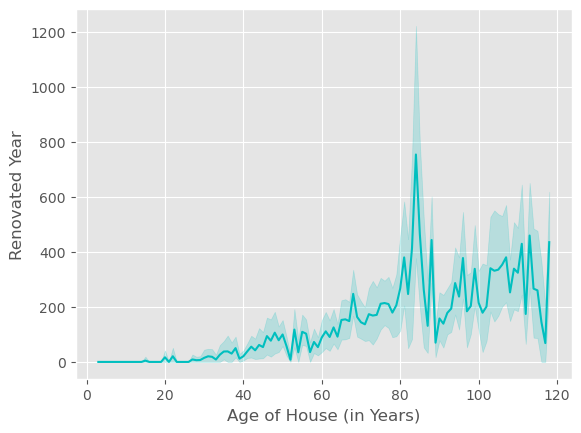

In [28]:
sns.lineplot(x = "Age of House (in Years)", y = "Renovated Year" ,data=df, color ='c')
plt.show()

# Plotting histogram for the Basement Area (in Sqft) column

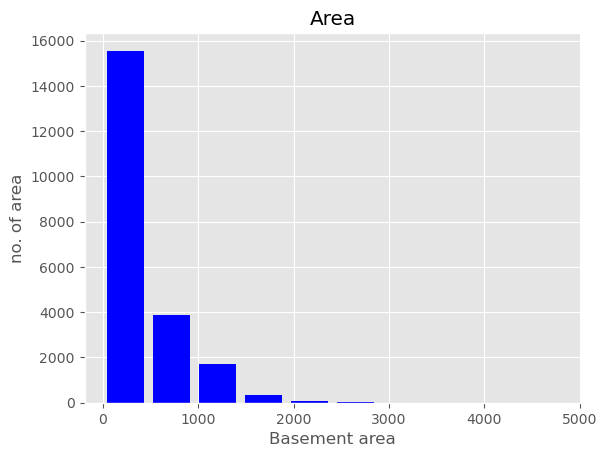

In [29]:
plt.hist(df['Basement Area (in Sqft)'], rwidth = 0.8,histtype = "bar", color = 'b')
plt.title("Area")
plt.xlabel("Basement area")
plt.ylabel("no. of area")
plt.show()

In [30]:
# This code counts the occurrences of unique values in the "Overall Grade" column of a DataFrame and returns the counts as a Series
df["Overall Grade"].value_counts()

Overall Grade
7     8981
8     6068
9     2615
6     2038
10    1623
5      242
4       29
2       13
3        3
1        1
Name: count, dtype: int64

# Plotting bar graph for the Overall Grades column 

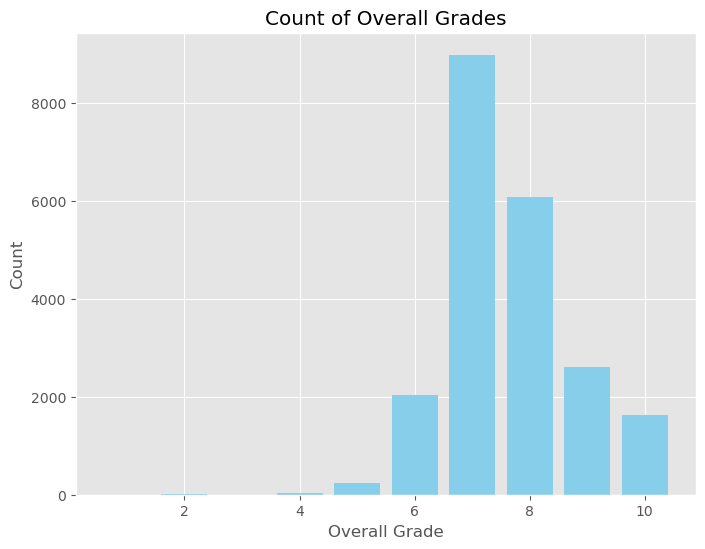

In [31]:
# The grades and their corresponding counts
grade = [7, 8, 9, 6, 10, 5, 4, 2, 3, 1]
count = [8981, 6068, 2615, 2038, 1623, 242, 29, 13, 3, 1]

plt.figure(figsize=(8, 6)) 

# Plotting a bar chart
plt.bar(grade, count, color='skyblue',label=count)

# Adding labels and title
plt.xlabel('Overall Grade')
plt.ylabel('Count')
plt.title('Count of Overall Grades')

# Display the plot
plt.show()


In [32]:
# This code counts the occurrences of unique values in the "No of Times Visited" column of a DataFrame and returns the counts as a Series
df['No of Times Visited'].value_counts()

No of Times Visited
None      19489
Twice       963
Thrice      510
Once        332
Four        319
Name: count, dtype: int64

# Plotting pie chart graph Number of Times Visited column

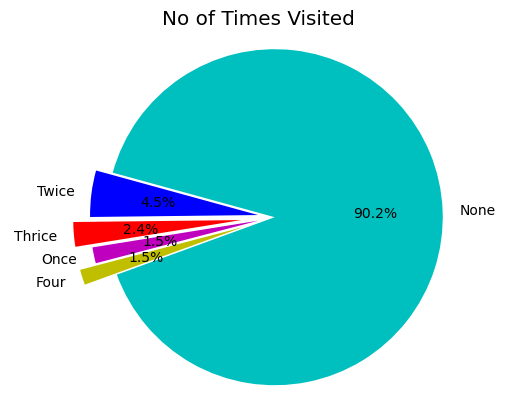

In [33]:
labels = ['None', 'Twice', 'Thrice', 'Once', 'Four']
counts = [19489, 963, 510, 332, 319]
color=['c','b','r','m','y']
explode = (0,0.1,0.2,0.1,0.2) 
plt.pie(counts, labels=labels, colors = color,explode= explode ,autopct='%1.1f%%',startangle=200 )
plt.title('No of Times Visited')

plt.axis('equal') 
plt.show()

# Plotting histogram graph for Age of House column 

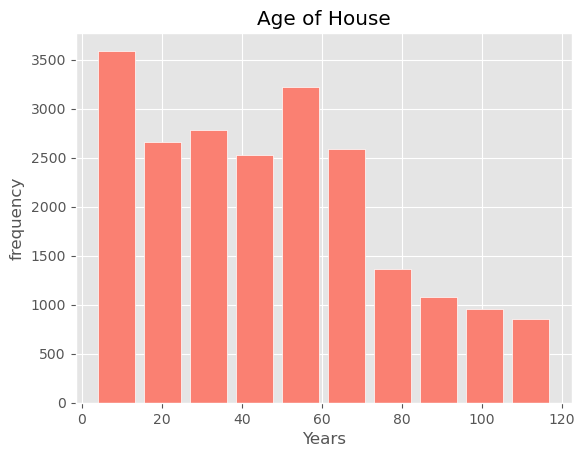

In [34]:
# Histogram of Age of house 
plt.hist(df['Age of House (in Years)'], rwidth = 0.8,histtype = "bar", color = 'salmon',edgecolor = 'white')

# Adding title and labels to the plot
plt.title("Age of House")
plt.xlabel("Years")
plt.ylabel("frequency")

#Show plots
plt.show()

In [35]:
# This code counts the occurrences of unique values in the "Condition of the House" column of a DataFrame and returns the counts as a Series
df['Condition of the House'].value_counts()

Condition of the House
Fair         14031
Good          5679
Excellent     1701
Okay           172
Bad             30
Name: count, dtype: int64

# Plotting pie plot for Condition of the House column 

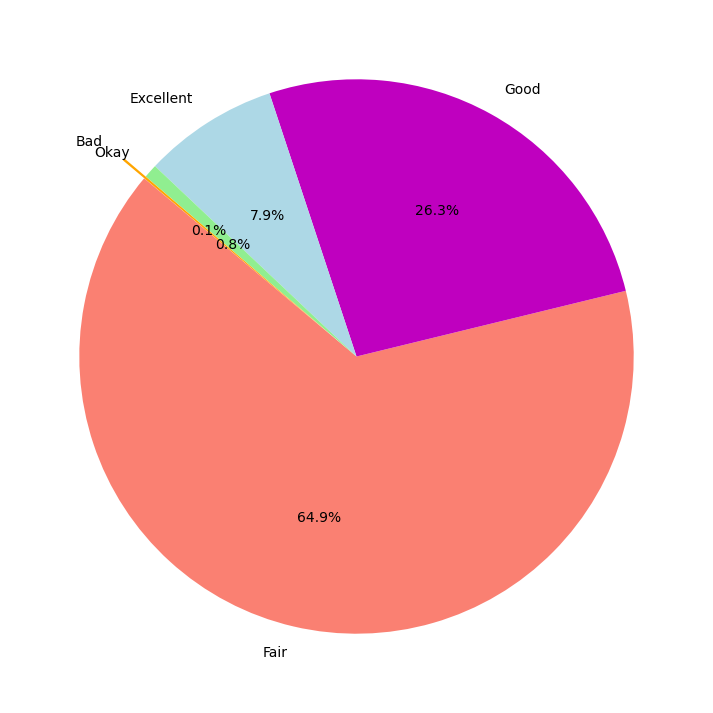

In [36]:
# Create a figure for subplots
plt.figure(figsize=(16,9))

condition = df['Condition of the House'].value_counts()

#Define colors
color = ['salmon', 'm', 'lightblue', 'lightgreen', 'orange']
explode = (0, 0, 0, 0,0.1)
plt.pie(condition,labels=condition.index, colors = color,explode=explode ,startangle=140,autopct='%1.1f%%')

# Show the Plots
plt.show()

# Histogram plot

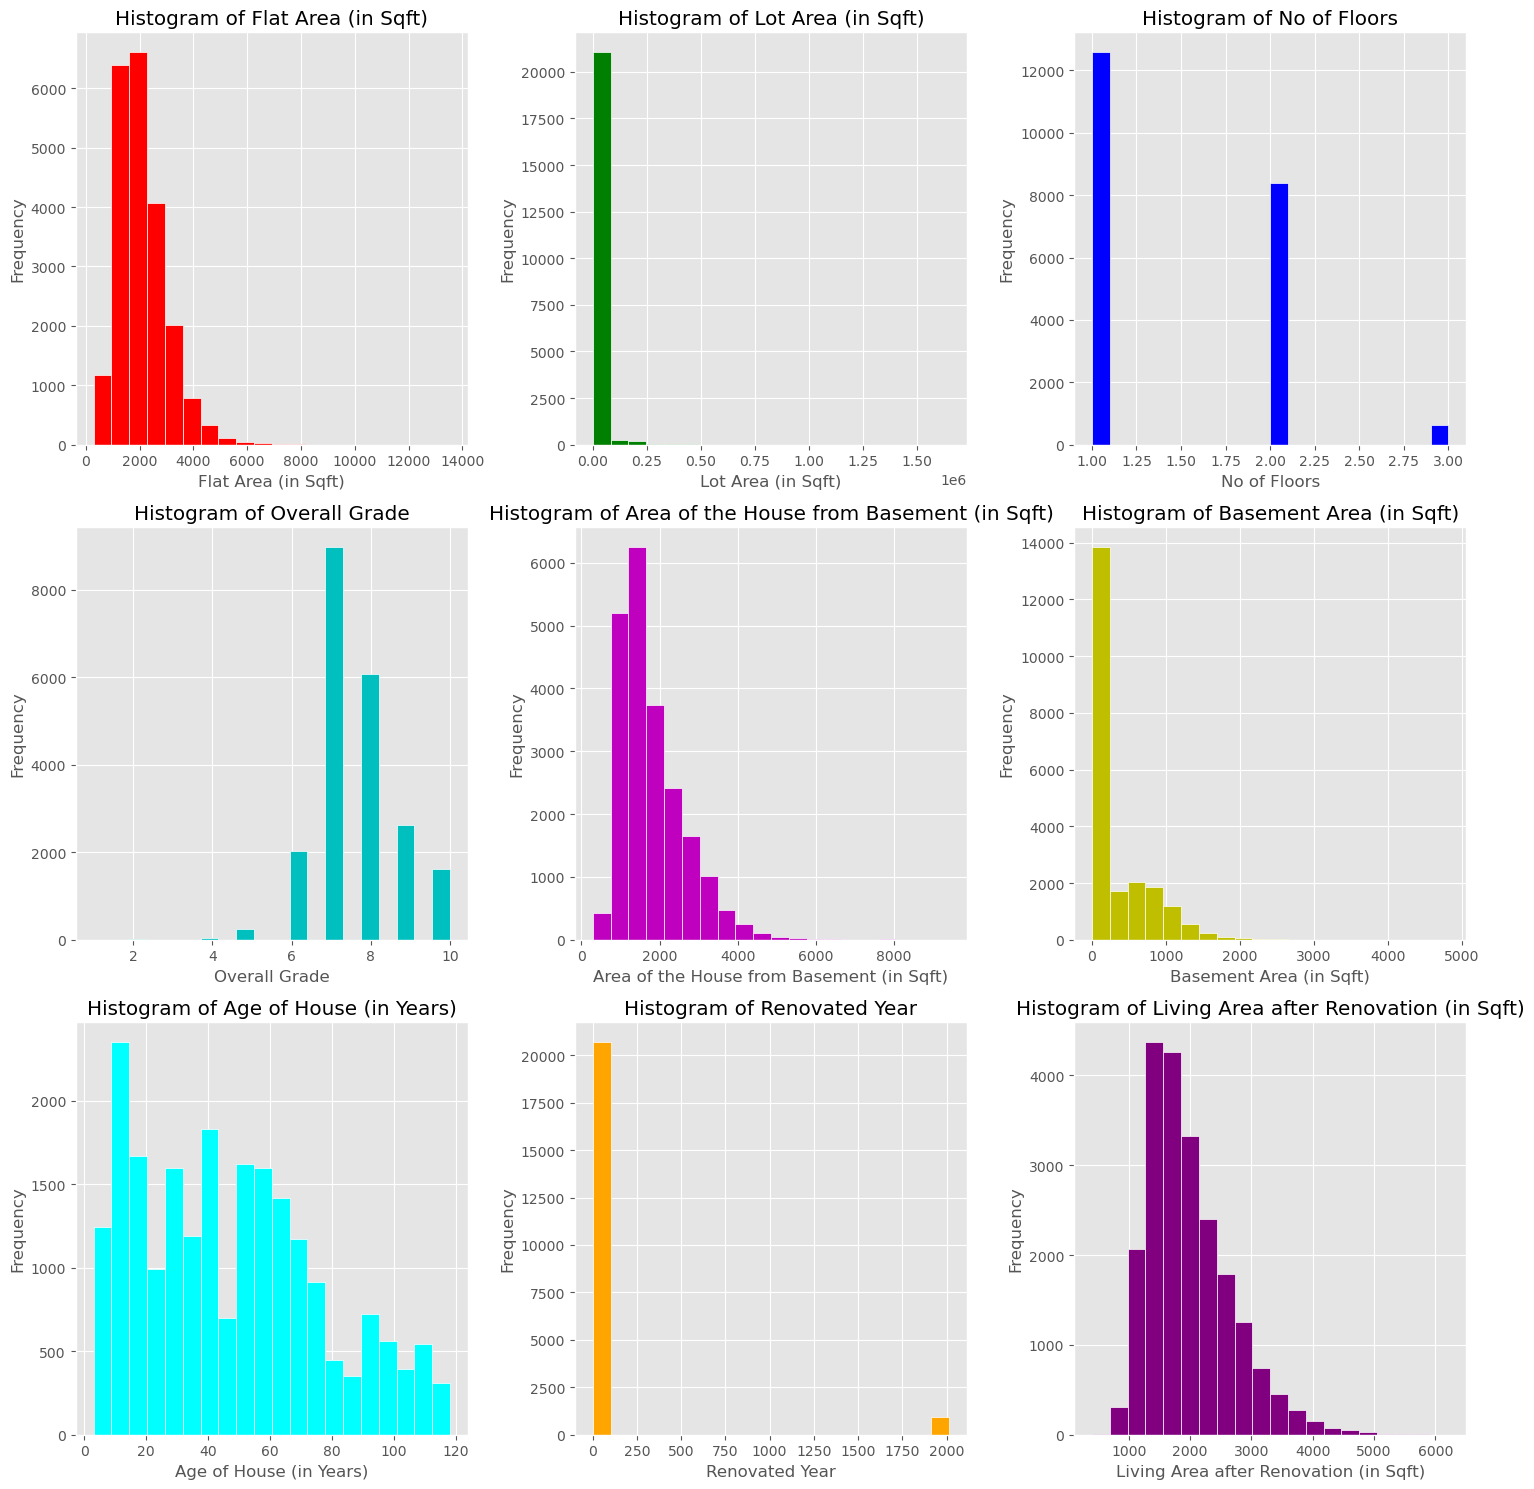

In [37]:
# Your list of columns
columns_for_histogram = [
    'Flat Area (in Sqft)',
    'Lot Area (in Sqft)',
    'No of Floors',
    'Overall Grade',
    'Area of the House from Basement (in Sqft)',
    'Basement Area (in Sqft)',
    'Age of House (in Years)',
    'Renovated Year',
    'Living Area after Renovation (in Sqft)'
]

# Define colors for each column
color = ['r', 'g', 'b', 'c', 'm', 'y', 'cyan', 'orange', 'purple']

plt.figure(figsize=(15, 15))

for i, (column, color) in enumerate(zip(columns_for_histogram, color), 1):
    plt.subplot(3, 3, i)
    plt.hist(df[column].dropna(), bins=20, color=color, edgecolor='white')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Scatter plot

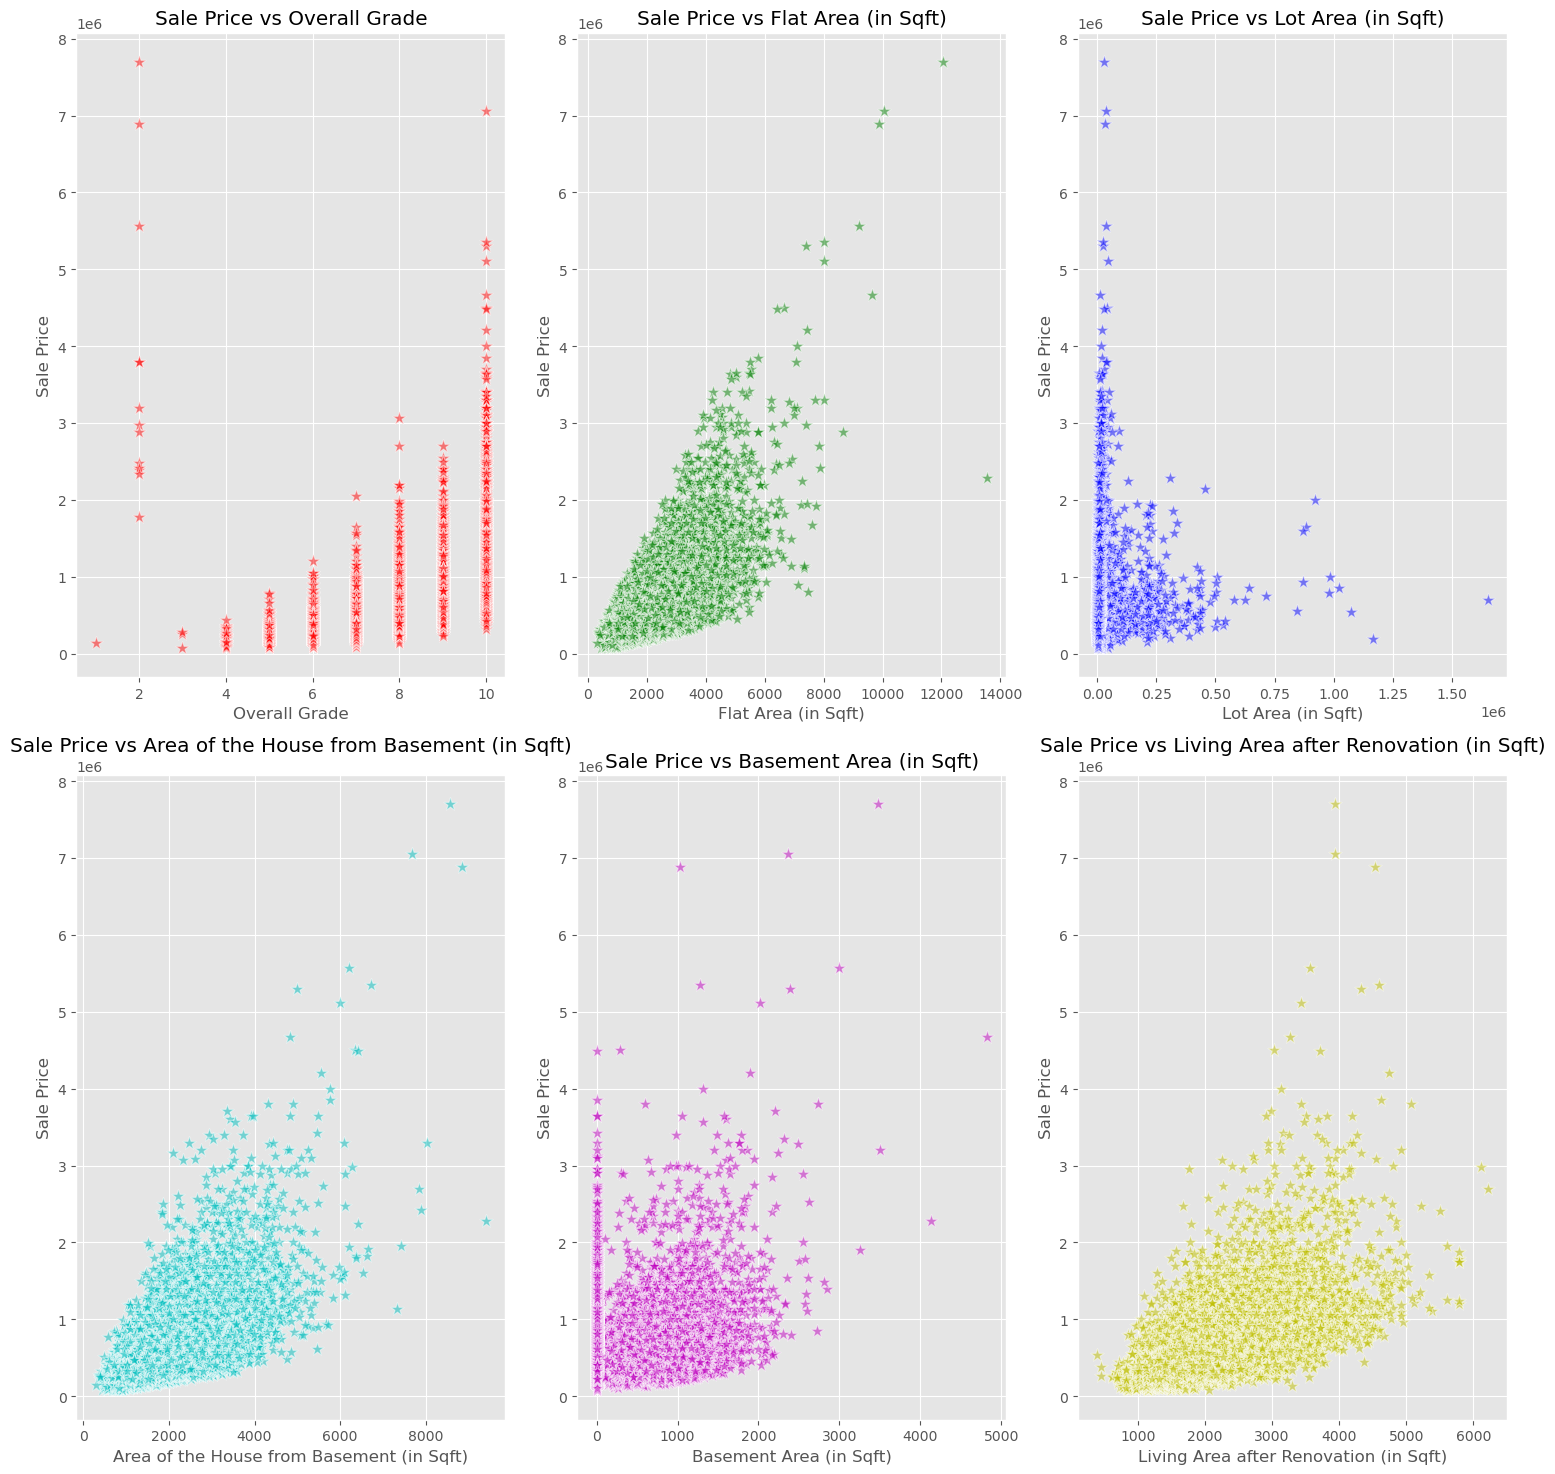

In [38]:
columns_for_scatter = [
    'Overall Grade',
    'Flat Area (in Sqft)',
    'Lot Area (in Sqft)',
    'Area of the House from Basement (in Sqft)',
    'Basement Area (in Sqft)',
    'Living Area after Renovation (in Sqft)'
]

color = ['r', 'g', 'b', 'c', 'm', 'y']

plt.figure(figsize=(15, 15))
for i, (column,color) in enumerate(zip(columns_for_scatter,color), 1):
    # Create subplots
    plt.subplot(2, 3, i)
    
    #scatter plots using Seaborn
    sns.scatterplot(x=df[column], y=df['Sale Price'], color=color, marker='*', s=100, alpha=0.5)
    
    # Set title and labels for each subplot
    plt.title(f"Sale Price vs {column}")
    plt.xlabel(column)
    plt.ylabel('Sale Price')

plt.tight_layout()

# Show the plots
plt.show()

# Hexbin plot

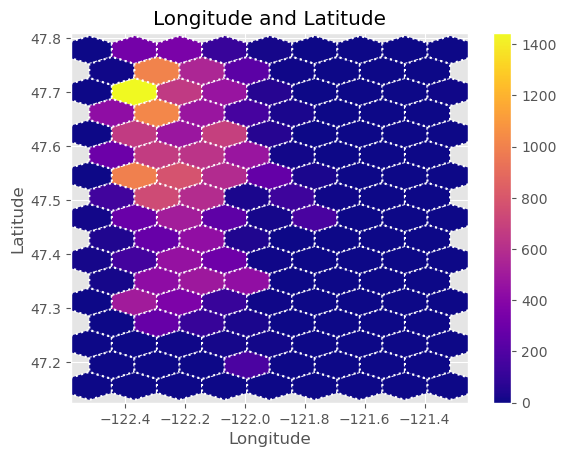

In [39]:
"""This code creates a hexbin plot using Matplotlib to visualize the distribution of data points based on their longitude and 
latitude"""

plt.hexbin(x = df['Longitude'], y = df['Latitude'], gridsize=(8,8), cmap='plasma', linewidths=1.5, edgecolors="white", linestyle='dotted')

# Adding title
plt.title("Longitude and Latitude")

# Labeling the x-axis and y-axis
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.colorbar()

# Show the Plots
plt.show()

# THANK YOU